# Diederske grupe 
Študiramo (2d) upodobitve diederskih grup
 $D_{2n} = <r, s \mid r^n = s^2 = (rs)^2 = 1>$.

### Diferencial $\mathcal L_{\text{rel}}$
$$
 L_{\text{rel}} = \frac{1}{3}(||\rho(s)^2 - I ||^2_F + ||\rho(r)^n -I||^2_F + || (\rho(r)\rho(s))^2 - I ||^2_F) 
$$
Veljajo pa enakosti
$$
||(AB^n - I)||_F^2 = tr((AB^n - I) (AB^n - I)^T) =\\
= tr((AB(AB)^T)^n) - 2tr((AB)^n) + n
$$ 
in
$$
d(||(AB^n - I)||_F^2 ) = 
\\
=
tr([n((AB)^TAB)^{n-1} (AB)^T + n (AB)^T(AB (AB)^T)^{n-1}]d(AB))
- tr(2n(AB)^{n-1}d(AB))
=\\=
tr(([n((AB)^TAB)^{n-1} (AB)^T + n (AB)^T(AB (AB)^T)^{n-1}] - 
2n(AB)^{n-1})d(AB))
$$
Zato je 
$$\frac{d}{dA}||(AB^n - I)||_F^2 =\\= (([nB((AB)^TAB)^{n-1} (AB)^T + n (AB)^T(AB (AB)^T)^{n-1}] - 
2n(AB)^{n-1}))^T$$
in
$$\frac{d}{dB}||(AB^n - I)||_F^2 =\\= (([n((AB)^TAB)^{n-1} (AB)^T + n (AB)^T(AB (AB)^T)^{n-1}] - 
2n(AB)^{n-1})A)^T$$

Definiramo še $Q(A, B) = ([n((AB)^TAB)^{n-1} (AB)^T + n (AB)^T(AB (AB)^T)^{n-1}] - 
2n(AB)^{n-1})$. Tako postane $\frac{d}{dR}||(RM^n - I)||_F^2  = MQ(R,M)$ in $\frac{d}{dS}||(MS^n - I)||_F^2  = Q(R,M)M$


Tako je TODO 

In [93]:
# definiraj grad_L
import numpy as np
#from numpy.linalg import matrix_power as pow

def pow(A, n):
    dim = A.shape[0]
    X = np.eye(dim)
    for i in range(n):
        X = X @ A
    return X

def Q(A,B, n):
    AB = A @ B
    ABT = AB.transpose()
    return n* pow(ABT@AB, n-1) @ ABT + n * ABT @ pow(AB @ ABT, n-1) - 2*n*pow(AB, n-10)

def d_Lrel_dR(R, S, n):
    dim = R.shape[0]
    return Q(R, np.eye(dim), n) + S @ Q(R, S, 2)

def d_Lrel_dS(R, S):
    dim = R.shape[0]
    return Q(np.eye(dim),S, 2) +  Q(R, S, 2) @ R


    


In [94]:
R = np.random.rand(2,2)
S = np.random.rand(2,2)


In [ ]:
# poženi solve_ivp
from scipy.integrate import solve_ivp
n= 3
dim = 2
t_max = 10
def neg_grad(t, z):
    R = np.reshape(z[:len(z)//2], (dim, dim))
    S = np.reshape(z[len(z)//2:], (dim, dim))

    dR = -d_Lrel_dR(R,S, n)
    dS =  -d_Lrel_dS(R, S)
    return np.concatenate((dR, dS), axis=None)

R0= np.random.rand(2,2)*10
#S0= np.random.rand(2,2)*10
S0 = np.array([[0,1.2],[1.2,0]])
R0 = np.array([[1, 0.5],[0.5, 1]])

P0 = np.concatenate((R0, S0), axis=None)


array([-342., -348., -348., -342., -264., -268., -268., -264.])

In [96]:
solution = solve_ivp(neg_grad, (0, t_max), P0)#, method='Radau')


/tmp/ipykernel_188332/2682653606.py:15: RuntimeWarning: overflow encountered in matmul
  return n* pow(ABT@AB, n-1) @ ABT + n * ABT @ pow(AB @ ABT, n-1) - 2*n*pow(AB, n-10)
/tmp/ipykernel_188332/2682653606.py:15: RuntimeWarning: invalid value encountered in add
  return n* pow(ABT@AB, n-1) @ ABT + n * ABT @ pow(AB @ ABT, n-1) - 2*n*pow(AB, n-10)
/tmp/ipykernel_188332/2682653606.py:23: RuntimeWarning: invalid value encountered in matmul
  return Q(np.eye(dim),S, 2) +  Q(R, S, 2) @ R
/tmp/ipykernel_188332/2682653606.py:9: RuntimeWarning: overflow encountered in matmul
  X = X @ A
/tmp/ipykernel_188332/2682653606.py:15: RuntimeWarning: invalid value encountered in matmul
  return n* pow(ABT@AB, n-1) @ ABT + n * ABT @ pow(AB @ ABT, n-1) - 2*n*pow(AB, n-10)
/tmp/ipykernel_188332/2682653606.py:9: RuntimeWarning: invalid value encountered in matmul
  X = X @ A
/tmp/ipykernel_188332/2682653606.py:13: RuntimeWarning: overflow encountered in matmul
  AB = A @ B


In [97]:
def get_matrices(solution_y, index):
      z = solution_y.transpose()[index]
      R = np.reshape(z[:len(z)//2], (dim, dim))
      S = np.reshape(z[len(z)//2:], (dim, dim))
      return R, S
def get_characters(solution_y):
    solutions = solution_y.transpose()
    char_R = []
    char_S=[]
    for z in solutions:
            R = np.reshape(z[:len(z)//2], (dim, dim))
            S = np.reshape(z[len(z)//2:], (dim, dim))
            char_R.append(np.trace(R))
            char_S.append(np.trace(S))

    return char_R, char_S

charR, charS = get_characters(solution.y)

In [98]:
get_matrices(solution.y, 50)

(array([[ 9.99998586e-01,  3.29041084e-04],
        [-3.26272467e-04,  9.99998585e-01]]),
 array([[ 9.99999286e-01,  2.56518770e-04],
        [-2.55134461e-04,  9.99999287e-01]]))

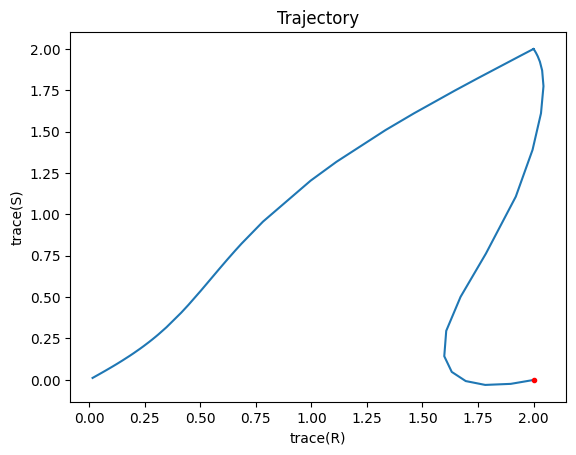

In [99]:
import matplotlib.pyplot as plt


plt.plot(charR, charS)
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=t_max)  # Normalize based on time range
# plot initial step
plt.plot(charR[0], charS[0], 'ro', label='Initial point', markersize=3)
for index, (cR, cS) in enumerate(zip(charR, charS)):
    plt.plot(cR, cS, color=cmap(norm(solution.t[index])), lw=2)

plt.xlabel('trace(R)')
plt.ylabel('trace(S)')
plt.title('Trajectory')
plt.show()






In [ ]:
# graf karakterjev
import numpy as np
from tqdm import tqdm
raise NotImplementedError
# get grid
resolution = 10
t_max = 1
min_param = -2
max_param = 2

x = np.linspace(-2, 2, resolution)
x, y = np.meshgrid(x, x, x, x, x, x, x, x)

grid = np.zeros((resolution, resolution, 1))

for index, (x0, y0) in tqdm(enumerate(zip(x.flatten(), y.flatten())) , total=resolution ** 2):
    solution = solve_ivp(neg_grad, (0, t_max), (x0, y0))

    grid[index // resolution][index % resolution] = np.degrees(np.arctan2(solution.y[1][-1], solution.y[0][-1]))


plt.figure(figsize=(16, 16))
# plot the grid
plt.imshow(grid, cmap='viridis', extent=(min_param, max_param, min_param, max_param), origin='lower')

plt.colorbar(label='Angle of the limit point (in degrees)')

# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', color="red", label='Unit Circle')

plt.show()



    